### Pandas란?
 데이터 처리와 분석에 최적화된 라이브러리
 - 행과 열(테이블 형태)로 이루어진 데이터 객체를 만들어 다룰 수 있음
 - 빅데이터를 처리하고 분석하는데 편리한 함수들을 제공
 - Panel datas의 약자  

### Pandas 구조
- Series : 1차원 데이터들의 집합(index + value)
- DataFrame : 2차원의 행과 열로 이루어진 표 형태의 데이터 집합(1차원의 Series가 모여서 DF를 이룸)

#### Pandas 데이터 구조
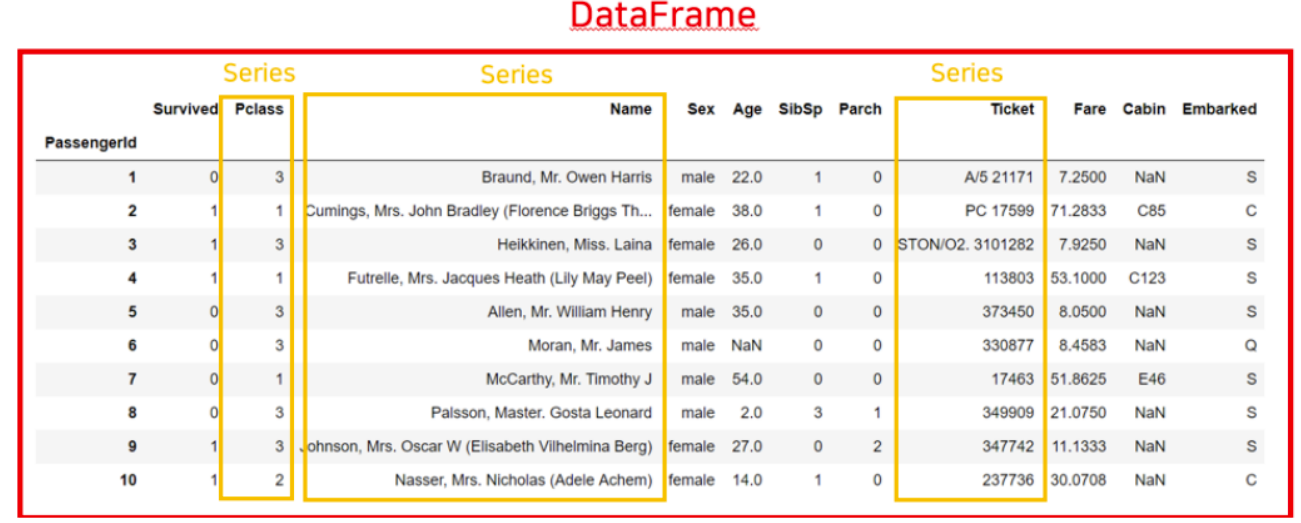

### Pandas 라이브러리 불러오기

In [2]:
import pandas as pd

#### Series 생성
- 각 도시들의 인구수를 Series로 만들어보자!

In [3]:
# 인덱스를 따로 설정하지 않으면 좌측에 자동으로 인덱스 번호가 0번부터 생성됨
population = pd.Series([9904312, 3448737, 2890451, 2466052])
population

0    9904312
1    3448737
2    2890451
3    2466052
dtype: int64

#### 인덱스를 지정하여 Series생성

In [4]:
population = pd.Series([9904312, 3448737, 2890451, 2466052],
                      index=['서울', '부산', '인천', '대구'])
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [5]:
# 딕셔너리 형태로 Series생성
population = pd.Series({"서울":9904312, "부산":3448737, "인천":2890451, "대구":2466052})
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

#### Series 이름, 인덱스 이름 지정

In [6]:
# Series이름 설정
population.name = "인구"
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [7]:
# index 이름 설정
population.index.name = "도시"
population

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [8]:
# index 변경하기
population.index = ['1', '2', '3', '4']
population

1    9904312
2    3448737
3    2890451
4    2466052
Name: 인구, dtype: int64

In [9]:
population = pd.Series([9904312, 3448737, 2890451, 2466052],
                      index=['서울', '부산', '인천', '대구'])
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

#### Series 데이터 갱신, 추가, 삭제

In [10]:
# 데이터 갱신
population['부산'] = 3500000
population

서울    9904312
부산    3500000
인천    2890451
대구    2466052
dtype: int64

In [11]:
# 데이터 추가
population['대전'] = 2400000
population

서울    9904312
부산    3500000
인천    2890451
대구    2466052
대전    2400000
dtype: int64

In [12]:
# 데이터 삭제
del population['서울']
population

부산    3500000
인천    2890451
대구    2466052
대전    2400000
dtype: int64

#### DataFrame 생성

In [13]:
# 딕셔너리를 이용해서 생성하기!
data = {'2015':[9904312, 3448737, 2890451, 2466052],
        '2010':[9631482, 3393191, 2632035, 2431774]
       }

In [14]:
# Series와는 달리 key값이 컬럼명으로 들어감(Series에서는 key값이 index)
population_df = pd.DataFrame(data)
population_df

,2015,2010
0,9904312,9631482
1,3448737,3393191
2,2890451,2632035
3,2466052,2431774


In [15]:
# 리스트를 이용하여 생성하기!
data = [[9904312, 3448737, 2890451, 2466052],
        [9631482, 3393191, 2632035, 2431774]
       ]
ind = ['2015', '2010']
col = ['서울', '부산', '인천', '대구']

In [16]:
population_df2 = pd.DataFrame(data, index=ind, columns=col)
population_df2

,서울,부산,인천,대구
2015,9904312,3448737,2890451,2466052
2010,9631482,3393191,2632035,2431774


#### 정리
-DF를 생성하는 방법은 2가지(딕셔너리 방식, 리스트 방식)
- 딕셔너리 방식은 값이 위에서 아래로 들어가고, 리스트 방식은 보이는 위치에 그대로 들어감

In [17]:
# .T : DF의 행과 열을 반대로 출력(역행렬, 전치)
population_df2=population_df2.T
population_df2

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


#### DF에 새로운 컬럼 추가하기

In [18]:
population_df2['2005'] = [9762546, 3512547, 2517680, 2456016]
population_df2

,2015,2010,2005
서울,9904312,9631482,9762546
부산,3448737,3393191,3512547
인천,2890451,2632035,2517680
대구,2466052,2431774,2456016


#### 컬럼 삭제

In [19]:
del population_df2['2005']
population_df2

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [20]:
population_df2['2005'] = [9762546, 3512547, 2517680, 2456016]
population_df2

,2015,2010,2005
서울,9904312,9631482,9762546
부산,3448737,3393191,3512547
인천,2890451,2632035,2517680
대구,2466052,2431774,2456016


#### 행 or 열 삭제

In [21]:
# axis의 기본값은 0이며 행을 삭제함
# axis=1은 열을 삭제
# inplace=True : 변경된 사항을 변수에 바로 적용시키는 명령
population_df2.drop('2005', axis=1, inplace=True)
population_df2

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


#### 정리
- del은 컬럼(열) 삭제
- drop은 행, 열 방향 삭제(방향 설정 필요, axis=0 : 행, axis=1 : 열)

#### DF의 속성 확인
- 형태, 값, 인덱스, 컬럼명 확인

In [22]:
population_df2

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [23]:
# DF 형태 확인하기
# numpy의 배열과 같음
population_df2.shape

(4, 2)

In [24]:
# DF내의 데이터 값만 추출하기
population_df2.values

array([[9904312, 9631482],
       [3448737, 3393191],
       [2890451, 2632035],
       [2466052, 2431774]], dtype=int64)

In [25]:
# DF내의 인섹스 확인
population_df2.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [26]:
# DF내의 컬럼명 확인
population_df2.columns

Index(['2015', '2010'], dtype='object')

In [27]:
data = [[175.3, 66.2, 27.0],
        [180.2, 78.9, 49.0],
        [178.6, 55.1, 35.0]
       ]
ind = ['홍길동', '김사또','임꺽정']
col = ['키', '몸무게', '나이']
name1 = pd.DataFrame(data, index=ind, columns=col)
name2 = name1.T
name1

,키,몸무게,나이
홍길동,175.3,66.2,27.0
김사또,180.2,78.9,49.0
임꺽정,178.6,55.1,35.0


In [28]:
name2

,홍길동,김사또,임꺽정
키,175.3,180.2,178.6
몸무게,66.2,78.9,55.1
나이,27.0,49.0,35.0


#### Pandas 연산
- Series 연산

In [29]:
population = pd.Series([9904312, 3448737, 2890451, 2466052],
                       index=['서울', '부산', '인천', '대구'])
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [30]:
population2 = pd.Series([9631482, 3393191, 2632035, 2431774],
                           index=['서울', '부산', '인천', '대전'])
population2

서울    9631482
부산    3393191
인천    2632035
대전    2431774
dtype: int64

In [31]:
population/1000000

서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
dtype: float64

In [32]:
population-population2

대구         NaN
대전         NaN
부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

#### 정리
- 인덱스가 다른 DF끼리는 값이 생성되지 않음
- Nan(Not a number): 정해지지 않고 비어있는 값

### Pandas에서 데이터 접근을 위한 인덱싱, 슬라이싱
- 인덱스 번호로 접근 : 0부터 시작
- 인덱스 명으로 접근
- loc, iloc 인덱서 접근 ; loc(인덱스 문자), iloc(인덱스 번호)
- 불리언 인덱싱 : True, False값을 활용하여 조건에 맞는 데이터만 출력

- Series 인덱싱

In [33]:
score = pd.Series({'java':70, 'python':95, 'html/css':80, 'ML':82})
score

java        70
python      95
html/css    80
ML          82
dtype: int64

In [34]:
# 인덱스 번호로 접근
score[1]

95

In [35]:
# 인덱스 명으로 접근
score['python']

95

In [36]:
# 인덱스 명칭 자체에 접근하고 싶을 때
score.index[1]

'python'

#### Series 슬라이싱

In [37]:
# pyrhon부터 ML까지 인덱스 번호로 접근
score[1:]
# 범위를 지정해주면 Series전체에 접근하기 때문에 인덱스명까지 같이 출력됨

python      95
html/css    80
ML          82
dtype: int64

In [38]:
# 데이터 값에만 접근
score.values[1:]

array([95, 80, 82], dtype=int64)

In [39]:
# 인덱스에만 접근
score.index[1:]

Index(['python', 'html/css', 'ML'], dtype='object')

In [40]:
# 인덱스 명으로 접근
score['python':'ML']

python      95
html/css    80
ML          82
dtype: int64

#### DF 인덱싱, 슬라이싱

In [41]:
# 데이터 로드
# encoding : 컴퓨터가 글자를 인식할 수 있게 해주는 과정
# 'euc-kr' : 한글 전용 인코딩 방식
score_data = pd.read_csv('data/score.csv', encoding='euc-kr', index_col='과목')
score_data

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


- DF 열(컬럼) 인덱싱

In [42]:
# 1반 컬럼에 접근
score_data['1반']

과목
수학    45
영어    76
국어    47
사회    92
과학    11
Name: 1반, dtype: int64

In [43]:
# []를 하나 더 씌우면 2처원(데이터 프레임으로 출력)
score_data[['1반']]

,1반
과목,
수학,45
영어,76
국어,47
사회,92
과학,11


In [44]:
# 두 개 이상의 컬럼 인덱싱(반드시 []를 두개 써줘야함)
score_data[['1반','3반']]

,1반,3반
과목,,
수학,45,73
영어,76,45
국어,47,45
사회,92,85
과학,11,47


#### DF 행 인덱싱
- 슬라이싱을 적용해야 함

In [45]:
score_data

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


In [46]:
score_data[0:1]

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39


In [47]:
score_data[0:2]

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69


In [48]:
score_data[0:3:2]

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
국어,47,92,45,69


#### 정리
- DF의 기본적인 열 접근은 대괄호와 컬럼명, 행 접근은 슬라이싱

#### loc, iloc 인덱서를 활용한 접근법
- 행과 열에 모두 접근 가능
- 기본적으로 loc, iloc 행에 먼저 접근
- loc는 문자로 접근, iloc는 숫자로 접근

In [49]:
score_data

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


In [50]:
# 각 반의 과학 점수에 접근
score_data.loc['과학']

1반    11
2반    79
3반    47
4반    26
Name: 과학, dtype: int64

In [51]:
# 4반의 과학 점수 출력
score_data.loc['과학', '4반']

26

In [52]:
# iloc를 활용하여 각 반의 과학 점수 출력
score_data.iloc[4]

1반    11
2반    79
3반    47
4반    26
Name: 과학, dtype: int64

In [53]:
# iloc를 활용하여 4반의 과학 점수 출력
score_data.iloc[4,3]

26

- 2반의 사회 점수에 loc, iloc를 각각 활요하여 접근해보세요~!

In [54]:
print(score_data.loc['사회', '2반'])
print(score_data.iloc[3,1])

81
81


- 2반, 3반의국어, 사회 점수에 접근해보세요~!

In [55]:
print(score_data.loc['국어':'사회', '2반':'3반'])
print(score_data.iloc[2:4,1:3])

    2반  3반
과목        
국어  92  45
사회  81  85
    2반  3반
과목        
국어  92  45
사회  81  85


#### 불리언 인덱싱
- DF에서 특정한 조건에 맞는 데이터에만 접근하기 위한 인덱싱 방법

In [56]:
score_data = score_data.T
score_data

과목,수학,영어,국어,사회,과학
1반,45,76,47,92,11
2반,44,92,92,81,79
3반,73,45,45,85,47
4반,39,69,69,40,26


In [57]:
# 영어가 75점 이상인 데이터값 추출

In [58]:
# Step.1
# score_data의 영어점수 중에서 75점 이상인 데이터를 True로 출력
score_data['영어'] >= 75

1반     True
2반     True
3반    False
4반    False
Name: 영어, dtype: bool

In [59]:
# Step.2
# True에 해당하는 값의 행 전체 데이터를 반환
score_data[score_data['영어'] >= 75] # DF명[조건식]

과목,수학,영어,국어,사회,과학
1반,45,76,47,92,11
2반,44,92,92,81,79


In [60]:
score_data[score_data['영어'] >= 75]['영어']

1반    76
2반    92
Name: 영어, dtype: int64

In [61]:
score_data[score_data['영어'] >= 75]['영어'][1]

92

### Pandas 유용한 함수들

#### 정렬
- index 및 컬럼명 기준 정렬 : sort_index()
- 값 기준 정렬 : sort_values()

In [62]:
score_data=score_data.T
score_data

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


- index 및 컬럼명 기준 정렬

In [63]:
# index 기준 정렬
# 한글일 경우 가나다 순
# 디폴트 값은 오름차순
score_data.sort_index()

,1반,2반,3반,4반
과목,,,,
과학,11,79,47,26
국어,47,92,45,69
사회,92,81,85,40
수학,45,44,73,39
영어,76,92,45,69


In [64]:
# 내림차순
score_data.sort_index(ascending=False)

,1반,2반,3반,4반
과목,,,,
영어,76,92,45,69
수학,45,44,73,39
사회,92,81,85,40
국어,47,92,45,69
과학,11,79,47,26


In [65]:
# 컬럼명 기준 내림차순 정렬
# drop과 axis가 반대 ㅠㅠ
# axis = 0 : 행 방향!
# axis = 1 : 열 방향!
score_data.sort_index(axis=1, ascending=False)

,4반,3반,2반,1반
과목,,,,
수학,39,73,44,45
영어,69,45,92,76
국어,69,45,92,47
사회,40,85,81,92
과학,26,47,79,11


- value 기준 정렬

In [66]:
# DF의 컬럼이나 index가 여러개일 경우 그 기준을 설정해줘야 함
score_data.sort_values(by='3반', ascending=False)

,1반,2반,3반,4반
과목,,,,
사회,92,81,85,40
수학,45,44,73,39
과학,11,79,47,26
영어,76,92,45,69
국어,47,92,45,69


In [67]:
# axis=1 : 열방향(가로)으로 정렬
score_data.sort_values(by='사회', axis=1, ascending=False)

,1반,3반,2반,4반
과목,,,,
수학,45,73,44,39
영어,76,45,92,69
국어,47,45,92,69
사회,92,85,81,40
과학,11,47,79,26


#### 정리
- axis=0 (행 방향)일 경우 기준을 컬럼명으로 잡고
- axis=1 (열 방향)일 경우 기준을 인덱스로 잡음

In [68]:
# 디폴트 값으로 오름차순
# 3반 기준으로 정렬 후, 그 중 같은 값들은 1반 기준으로 한번 더 정렬
score_data.sort_values(by=['3반', '1반'])

,1반,2반,3반,4반
과목,,,,
국어,47,92,45,69
영어,76,92,45,69
과학,11,79,47,26
수학,45,44,73,39
사회,92,81,85,40


### sum()

In [69]:
score_data

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


In [70]:
score_data.sum()# axis=0이 디폴트 값

1반    271
2반    388
3반    295
4반    243
dtype: int64

In [71]:
score_data.sum(axis=1)

과목
수학    201
영어    282
국어    253
사회    298
과학    163
dtype: int64

- 과목별 합계를 구하여 DF의 맨 우측에 '총합'컬럼을 추가해보세요~!

In [72]:
score_data['총합'] = score_data.sum(axis=1)

In [73]:
score_data

,1반,2반,3반,4반,총합
과목,,,,,
수학,45,44,73,39,201
영어,76,92,45,69,282
국어,47,92,45,69,253
사회,92,81,85,40,298
과학,11,79,47,26,163


#### mean()

- 각 과목들의 평균을 구하고 DF우측에 '평균' 컬럼을 생성해보세요~!

In [74]:
score_data['평균'] = score_data.iloc[:,:4].mean(axis=1)
score_data

,1반,2반,3반,4반,총합,평균
과목,,,,,,
수학,45,44,73,39,201,50.25
영어,76,92,45,69,282,70.50
국어,47,92,45,69,253,63.25
사회,92,81,85,40,298,74.50
과학,11,79,47,26,163,40.75


#### min(), max()

In [75]:
# 1반에서 가장 높은 점수
score_data['1반'].max()

92

In [76]:
# 행 방향 최대값
score_data[:].max()

1반     92.0
2반     92.0
3반     85.0
4반     69.0
총합    298.0
평균     74.5
dtype: float64

In [77]:
# 열 방향 최대값
score_data[:].max(axis=1)

과목
수학    201.0
영어    282.0
국어    253.0
사회    298.0
과학    163.0
dtype: float64

In [78]:
# 천체 반 중에서 가장 높은 수학 점수를 구해보세요~!
score_data.iloc[0,:4].max()

73.0

- 전체 과목 점수 중에서 과목별로 가장 큰 값과 작은 값의 차이를 구해보세요~!

In [79]:
max_score = score_data.iloc[:,:4].max(axis=1)

In [80]:
min_score = score_data.iloc[:,:4].min(axis=1)

In [81]:
print(max_score-min_score)


과목
수학    34
영어    47
국어    47
사회    52
과학    68
dtype: int64


#### count()
- DF에 존재하는 값들의 개수 출력

In [82]:
score_data

,1반,2반,3반,4반,총합,평균
과목,,,,,,
수학,45,44,73,39,201,50.25
영어,76,92,45,69,282,70.50
국어,47,92,45,69,253,63.25
사회,92,81,85,40,298,74.50
과학,11,79,47,26,163,40.75


In [83]:
score_data.count()

1반    5
2반    5
3반    5
4반    5
총합    5
평균    5
dtype: int64

#### info()
- DF에 대한 전체적인 정보를 출력

In [84]:
score_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 수학 to 과학
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1반      5 non-null      int64  
 1   2반      5 non-null      int64  
 2   3반      5 non-null      int64  
 3   4반      5 non-null      int64  
 4   총합      5 non-null      int64  
 5   평균      5 non-null      float64
dtypes: float64(1), int64(5)
memory usage: 452.0+ bytes


#### value_counts()
- 특정 컬럼에 있는 데이터들의 유니크 값과 그 개수를 출력 

In [85]:
df_test = pd.DataFrame([['집중','집중','집중','집중'],
                        ['집중','집중','집중','졸림'],
                        ['집중','집중','졸림','자냐?']
                       ],
                       columns=['1교시', '2교시', '3교시', '4교시'])
df_test

,1교시,2교시,3교시,4교시
0,집중,집중,집중,집중
1,집중,집중,집중,졸림
2,집중,집중,졸림,자냐?


In [86]:
df_test['3교시'].value_counts()

집중    2
졸림    1
Name: 3교시, dtype: int64

In [87]:
df_test['4교시'].value_counts()

집중     1
졸림     1
자냐?    1
Name: 4교시, dtype: int64

#### apply()
- 사용자 정의 함수를 이용하여 행 또는 열에 복잡한 처리를 한번에 해주는 함수

In [88]:
score_data.drop(['총합','평균'],axis=1,inplace=True)
score_data

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


In [89]:
# 최대값, 최소값의 차이를 계산해주는 사용자 정의 함수
def calculate(x):
    return x.max()-x.min()

In [90]:
# DF 내 전체 데이터에서 각 과목의 최대점수와 최소점수의 차이를 구하는 로직을 만들어보자~!
score_data.apply(calculate, axis=1)

과목
수학    34
영어    47
국어    47
사회    52
과학    68
dtype: int64

 - apply 함수에는 반드시 사용자 정의 함수가 포함되어야 함!

#### concat()
- Series나 DF을 병합할 때 사용

In [111]:
s1 = pd.Series([1,2,3,4,5])
s2 = pd.Series(['female', 'female', 'male', 'male', 'female'])
s3 = pd.Series([1,0,1,0,1])

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [92]:
s2

0    female
1    female
2      male
3      male
4    female
dtype: object

In [93]:
pd.concat([s1,s2,s3]) # axis=0 이 디폴트 값(위에서 아래쪽으로 합쳐짐)

0         1
1         2
2         3
3         4
4         5
0    female
1    female
2      male
3      male
4    female
0         1
1         0
2         1
3         0
4         1
dtype: object

In [94]:
ti = pd.concat([s1,s2,s3], axis=1)
ti.columns = ['Passengerid', "Sex", 'Survived']
ti

,Passengerid,Sex,Survived
0,1,female,1
1,2,female,0
2,3,male,1
3,4,male,0
4,5,female,1


#### groupby()
- 데이터를 그룹별로 묶어서 집계를 낼 수 있게 해주는 함수
- 엑셀의 피벗테이블 기능과 같음

In [95]:
# Sex 값에 따른 Survived 값의 합계 구하기 == 성별에 따른 생존자 수 확인하기
ti[['Sex', 'Survived']].groupby('Sex').sum()

,Survived
Sex,
female,2
male,1


In [96]:
# Sex, Survived값 기준으로 Passengerid의 개수 세기
# == 성별을 기준으로 생존자 수와 사망자 수를 카운트
ti.groupby(['Sex', 'Survived']).count()

Passengerid
Sex    Survived             
female 0                   1
       1                   2
male   0                   1
       1                   1

### Pandas 실습 예제!!!
2015~2017년 광주광역시 범죄현황 데이터를 이용해 전년 대비 지역별 범죄 증감율을 구해보자!
- (증감률 공식 = (금년-작년)/작년*100)

#### 데이터 로드
- 인덱스 컬럼은 '관서명'으로 설정할 것
- 인코딩은 'euc-kr'로 설정할 것

In [97]:
df_2015 = pd.read_csv('data/2015.csv', encoding='euc-kr', index_col='관서명')
df_2016 = pd.read_csv('data/2016.csv', encoding='euc-kr', index_col='관서명')
df_2017 = pd.read_csv('data/2017.csv', encoding='euc-kr', index_col='관서명')

In [98]:
df_2015.drop(['구분'], axis=1, inplace=True)
df_2016.drop(['구분'], axis=1, inplace=True)
df_2017.drop(['구분'], axis=1, inplace=True)

In [99]:
df_2015 = df_2015[::6]
df_2015

,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,
광주지방경찰청계,18,44,750,8425,9593
광주동부경찰서,3,5,92,1100,1155
광주서부경찰서,5,10,172,2050,2483
광주남부경찰서,1,3,70,962,1081
광주북부경찰서,5,14,256,2570,2621
광주광산경찰서,4,12,160,1743,2253


In [100]:
df_2016=df_2016[::6]
df_2016

,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,
광주지방경찰청계,17,47,701,6052,8599
광주동부경찰서,3,8,83,832,1142
광주서부경찰서,2,11,174,1417,2288
광주남부경찰서,1,4,64,768,1028
광주북부경찰서,6,7,205,1788,2142
광주광산경찰서,5,17,175,1247,1999


In [101]:
df_2017=df_2017[::6]
df_2017

,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,
광주지방경찰청계,9,33,725,4816,8366
광주지방경찰청,0,0,0,0,0
광주동부경찰서,3,5,77,624,1090
광주서부경찰서,0,7,196,1142,2293
광주남부경찰서,0,4,68,577,898
광주북부경찰서,3,5,215,1546,2176
광주광산경찰서,3,12,169,927,1909


In [102]:
df_2015=df_2015.sum(axis=1)
df_2016=df_2016.sum(axis=1)
df_2017=df_2017.sum(axis=1)


In [103]:
df_2015

관서명
광주지방경찰청계    18830
광주동부경찰서      2355
광주서부경찰서      4720
광주남부경찰서      2117
광주북부경찰서      5466
광주광산경찰서      4172
dtype: int64

In [104]:
df_2016

관서명
광주지방경찰청계    15416
광주동부경찰서      2068
광주서부경찰서      3892
광주남부경찰서      1865
광주북부경찰서      4148
광주광산경찰서      3443
dtype: int64

In [105]:
df_2017.drop('광주지방경찰청',inplace=True)

In [106]:
df_2017

관서명
광주지방경찰청계    13949
광주동부경찰서      1799
광주서부경찰서      3638
광주남부경찰서      1547
광주북부경찰서      3945
광주광산경찰서      3020
dtype: int64

In [107]:
# ti = pd.concat([s1,s2,s3], axis=1)
df_2016_2015=(df_2016-df_2015)/df_2015*100
df_2016_2015


관서명
광주지방경찰청계   -18.130643
광주동부경찰서    -12.186837
광주서부경찰서    -17.542373
광주남부경찰서    -11.903637
광주북부경찰서    -24.112697
광주광산경찰서    -17.473634
dtype: float64

In [108]:
df_2017_2016=(df_2017-df_2016)/df_2016*100
df_2017_2016

관서명
광주지방경찰청계    -9.516087
광주동부경찰서    -13.007737
광주서부경찰서     -6.526208
광주남부경찰서    -17.050938
광주북부경찰서     -4.893925
광주광산경찰서    -12.285797
dtype: float64

In [109]:
df = pd.concat([df_2015,df_2016_2015,df_2016,df_2017_2016,df_2017], axis=1)

In [110]:
df.columns = ['2015총계', "2015-16증감율", '2016총계',"2015-16증감율",'2017총계']
df

,2015총계,2015-16증감율,2016총계,2015-16증감율,2017총계
관서명,,,,,
광주지방경찰청계,18830,-18.130643,15416,-9.516087,13949
광주동부경찰서,2355,-12.186837,2068,-13.007737,1799
광주서부경찰서,4720,-17.542373,3892,-6.526208,3638
광주남부경찰서,2117,-11.903637,1865,-17.050938,1547
광주북부경찰서,5466,-24.112697,4148,-4.893925,3945
광주광산경찰서,4172,-17.473634,3443,-12.285797,3020
